### Problem Statement
You are a data scientist working for a school

You are asked to predict the GPA of the current students based on the following provided data: 

 0   StudentID  int64  
 1   Age    int64  
 2   Gender int64  
 3   Ethnicity  int64  
 4   ParentalEducation  int64  
 5   StudyTimeWeekly    float64
 6   Absences   int64  
 7   Tutoring   int64  
 8   ParentalSupport    int64  
 9   Extracurricular    int64  
 10  Sports int64  
 11  Music  int64  
 12  Volunteering   int64  
 13  GPA    float64
 14  GradeClass float64

The GPA is the Grade Point Average, typically ranges from 0.0 to 4.0 in most educational systems, with 4.0 representing an 'A' or excellent performance.

The minimum passing GPA can vary by institution, but it's often around 2.0. This usually corresponds to a 'C' grade, which is considered satisfactory.

You need to create a Deep Learning model capable to predict the GPA of a Student based on a set of provided features.
The data provided represents 2,392 students.

In this excersice you will be requested to create a total of three models and select the most performant one.


### 1) Import Libraries

First let's import the following libraries, if there is any library that you need and is not in the list bellow feel free to include it

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


### 2) Load Data

- You will be provided with a cvs (comma separated value) file.
- You will need to add that file into a pandas dataframe, you can use the following code as reference
- The file will be available in canvas

In [30]:
data = pd.read_csv('C:\\Users\\adria\\Downloads\\Student_performance_data.csv')
data

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0
2388,3389,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0
2389,3390,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0
2390,3391,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0


### 3) Review you data:

Make sure you review your data.
Place special attention of null or empty values.

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


### 4. Remove the columns not needed for Student performance prediction

- Choose only the columns you consider to be valuable for your model training.
- For example, StudentID might not be a good feature for your model, and thus should be removed from your main dataset, which other columns should also be removed?
- You can name that final dataset as 'dataset'

In [32]:
columns_to_remove = ['StudentID', 'GradeClass', 'Volunteering', 'Ethnicity'] # Añade las columnas que no son útiles
dataset = data.drop(columns=columns_to_remove)


### 5. Check if the columns has any null values:
- Here you now have your final dataset to use in your model training.
- Before moving foward review your data check for any null or empty value that might be needed to be removed

In [33]:
# Check for null values
null_values = dataset.isnull().sum()
print(null_values[null_values > 0])  # Print columns with null values


Series([], dtype: int64)


### 6. Prepare your data for training and for testing set:
 - First create a dataset named X, with all columns but GPA. These are the features
 - Next create another dataset named y, with only GPA column. This is the label
 - If you go to your Imports, you will see the following import: **'from sklearn.model_selection import train_test_split'**
 - Use that *train_test_split* function to create: X_train, X_test, y_train and y_test respectively. Use X and y datasets as parameters. Other parameters to use are: Test Size = 0.2, Random State = 42.
 
 - Standarize your features (X_train and X_test) by using the StandardScaler (investigate how to use fit_transform and transform functions). This will help the training process by dealing with normilized data.

 Note: Your X_train shape should be around (1913, 10). This means the dataset has 10 columns which should be the input.

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Step 1: Create X and y
X = dataset.drop(columns=['GPA'])  # All features except GPA
y = dataset['GPA']                   # Label is GPA

# Step 2: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Check the shape of X_train
print(X_train.shape)  # Should be around (1913, 10)


(1913, 10)


### 7. Define your Deep Neural Network.
- This will be a Sequential Neural Network.
- With a Dense input layer with 64 units, and input dimention of 10 and Relu as the activation function.
- A Dense hidden layer with 32 units, and Relu as the activation function.
- And a Dense output layer with 1 unit, do not define an activation function so it defaults to linear, suitable for regression tasks. e.g. Dense(1)

This last part of the output layer is super important, since we want to predict the GPA, this means that we want a regression and not a classification. Linear activation function is best for regression and Sigmoid is best for Binary Classification

In [35]:
# Define the model
model = Sequential()

# Input layer
model.add(Dense(64, input_dim=10, activation='relu'))

# Hidden layer
model.add(Dense(32, activation='relu'))

# Output layer
model.add(Dense(1))  # Linear activation is default, suitable for regressionS

# Summary of the model
model.summary()

c:\Users\adria\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 64)             │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,817 (11.00 KB)

 Trainable params: 2,817 (11.00 KB)

 Non-trainable params: 0 (0.00 B)

### 8. Compile your Neural Network
- Choose Adam as the optimizer
- And MSE as the Loss function
- Also add the following metrics: Mean Absolute Error

In [36]:
# Compile the model
model.compile(optimizer='adam', 
              loss='mean_squared_error', 
              metrics=['mae'])  # Mean Absolute Error


### 9. Fit (or train) your model
- Use the X_train and y_train datasets for the training
- Do 50 data iterations
- Choose the batch size = 10
- Also select a validation_split of 0.2
- Save the result of the fit function in a variable called 'history'

In [37]:
print(X_train.shape)


(1913, 10)


In [38]:
# Fit the model
history = model.fit(X_train, y_train, 
                    epochs=50, 
                    batch_size=10, 
                    validation_split=0.2)


Epoch 1/50


153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0854 - mae: 0.7949 - val_loss: 0.0922 - val_mae: 0.2514
Epoch 2/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 852us/step - loss: 0.0806 - mae: 0.2240 - val_loss: 0.0671 - val_mae: 0.2133
Epoch 3/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0557 - mae: 0.1856 - val_loss: 0.0575 - val_mae: 0.2000
Epoch 4/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 909us/step - loss: 0.0506 - mae: 0.1802 - val_loss: 0.0532 - val_mae: 0.1886
Epoch 5/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 886us/step - loss: 0.0442 - mae: 0.1671 - val_loss: 0.0506 - val_mae: 0.1838
Epoch 6/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 820us/step - loss: 0.0422 - mae: 0.1630 - val_loss: 0.0574 - val_mae: 0.1947
Epoch 7/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 972us/step - loss: 0.0403 - mae: 0.1579 - val_loss: 0.0507 - val_mae: 0.1807
Epoch 8/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0392 - mae: 0.1576 - val_loss: 0.0504 - val_mae: 0.1831
Epoch 9/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - los

### 10. View your history variable:
- Use Matplotlib.pyplot to show graphs of your model traning history
- In one graph:
   - Plot the Training Loss and the Validation Loss
   - X Label = Epochs
   - Y Label = Loss
   - Title = Training and Validation Loss over Epochs
- In a second graph:
   - Plot the Training MAE and the Validation MAE
   - X Label = Epochs
   - Y Label = Mean Absolute Error (MAE)
   - Title = Training and Validation MAE over Epochs

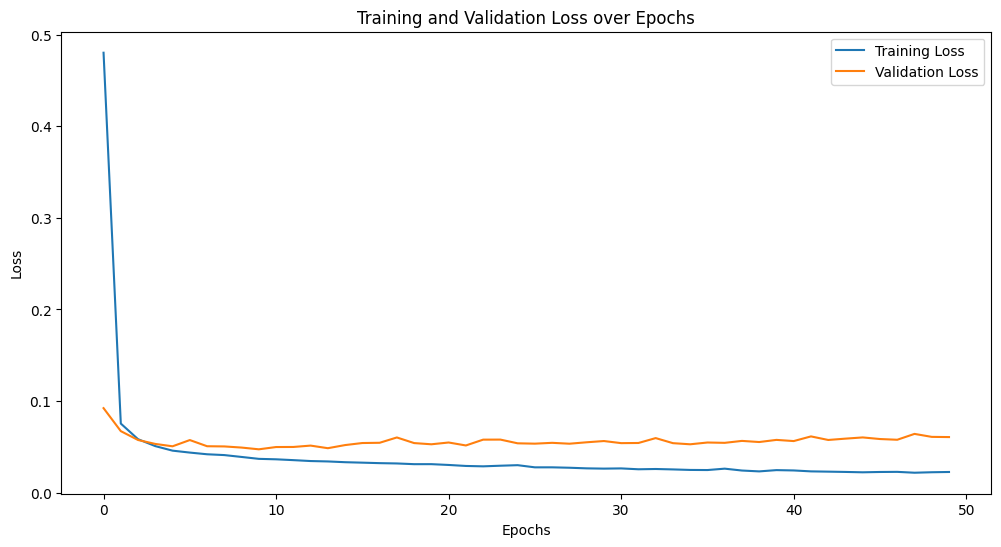

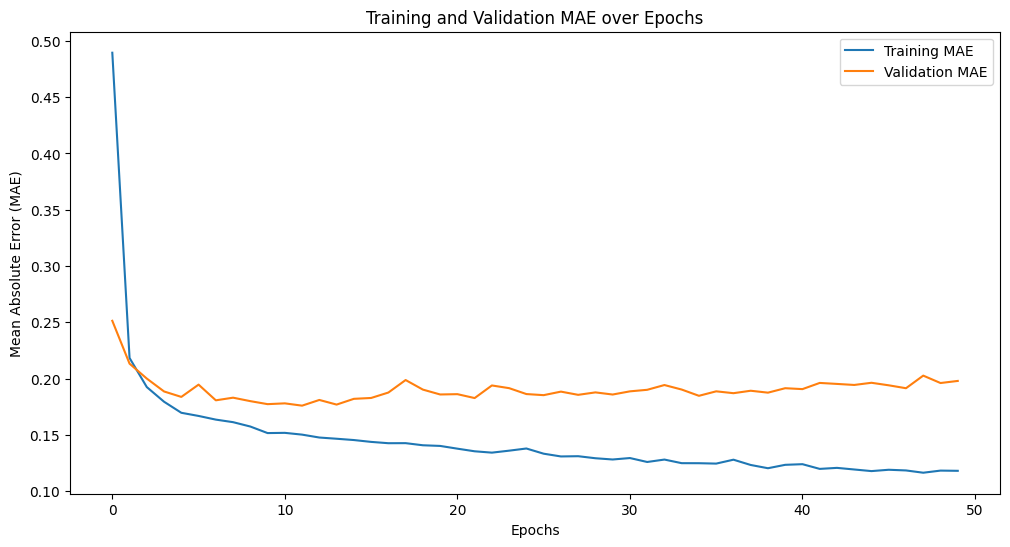

In [44]:
import matplotlib.pyplot as plt
# 1. Gráfico de la Pérdida (Loss) de Entrenamiento y Validación
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')  # Pérdida en entrenamiento
plt.plot(history.history['val_loss'], label='Validation Loss')  # Pérdida en validación
plt.title('Training and Validation Loss over Epochs')  # Título del gráfico
plt.xlabel('Epochs')  # Etiqueta del eje X
plt.ylabel('Loss')  # Etiqueta del eje Y
plt.legend()  # Leyenda
plt.show()

# 2. Gráfico del MAE (Mean Absolute Error) de Entrenamiento y Validación
plt.figure(figsize=(12, 6))
plt.plot(history.history['mae'], label='Training MAE')  # Error absoluto medio en entrenamiento
plt.plot(history.history['val_mae'], label='Validation MAE')  # Error absoluto medio en validación
plt.title('Training and Validation MAE over Epochs')  # Título del gráfico
plt.xlabel('Epochs')  # Etiqueta del eje X
plt.ylabel('Mean Absolute Error (MAE)')  # Etiqueta del eje Y
plt.legend()  # Leyenda
plt.show()


### 11. Evaluate your model:
- See the result of your loss function.
- What can you deduct from there?

In [45]:
# Evaluar el modelo en el conjunto de prueba
test_loss, test_mae = model.evaluate(X_test, y_test)

# Imprimir los resultados de la evaluación
print(f"Test Loss: {test_loss}")
print(f"Test MAE: {test_mae}")


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 680us/step - loss: 0.0597 - mae: 0.1940
Test Loss: 0.05897882208228111
Test MAE: 0.19408905506134033


Test Loss (Pérdida): La función de pérdida me indica qué tan bien se ajusta mi modelo a los datos de prueba. Un valor de 0.0597 sugiere que mi modelo tiene una baja pérdida, lo cual es una buena señal de que está bien entrenado.

Test MAE (Error Absoluto Medio): Con un valor de 0.1940, sé que en promedio, las predicciones de mi modelo están a 0.194 del valor real del GPA. Como el GPA está generalmente entre 0 y 4, este error promedio es bastante bajo, lo que indica que mi modelo está haciendo predicciones precisas.

### 12. Use your model to make some predictions:
- Make predictions of your X_test dataset
- Print the each of the predictions and the actual value (which is in y_test)
- How good was your model?

In [49]:
# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Asegurarse de que y_test es un array o convertirlo
y_test_array = y_test.values if hasattr(y_test, 'values') else y_test

# Imprimir cada predicción junto con el valor real (de y_test)
for i in range(len(y_test_array)):
    print(f"Prediction: {y_pred[i][0]}, Actual: {y_test_array[i]}")


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 654us/step
Prediction: 1.6527546644210815, Actual: 1.4277243762746905
Prediction: 2.989314556121826, Actual: 3.117354434785501
Prediction: 1.7553740739822388, Actual: 2.037768574636005
Prediction: 3.453036308288574, Actual: 3.5485205508668662
Prediction: 0.2825004458427429, Actual: 0.2489771312307257
Prediction: 2.859912872314453, Actual: 2.627693905554347
Prediction: 1.7579351663589478, Actual: 2.057378500596372
Prediction: 2.629941701889038, Actual: 2.248337588471201
Prediction: 2.0545098781585693, Actual: 2.1947065208246226
Prediction: 1.0930639505386353, Actual: 0.7581829737450007
Prediction: 2.6739280223846436, Actual: 2.370893096932428
Prediction: 0.7594481706619263, Actual: 0.7664048694920337
Prediction: 3.2146668434143066, Actual: 2.952721567213245
Prediction: 2.499385118484497, Actual: 2.3433313526833226
Prediction: 2.789438486099243, Actual: 2.7718106588704914
Prediction: 0.4852260947227478, Actual: 0.2878673233291232
Prediction: 1.03560400009155

## Respuesta
Viendo las predicciones y los valores reales, puedo observar que las predicciones del modelo están bastante cercanas a los valores reales del GPA, lo que indica que el modelo está funcionando de manera eficiente. Aunque el MAE es de 0.19, lo que ya es un error pequeño en comparación con el rango total del GPA (0 a 4), al observar visualmente las predicciones, puedo confirmar que en la mayoría de los casos, la diferencia entre las predicciones y los valores reales es muy baja.

Esto sugiere que mi modelo está capturando bien las relaciones en los datos y está haciendo predicciones bastante precisas. El hecho de que muchas de las predicciones estén a menos de 0.2 puntos de diferencia del valor real refuerza la idea de que el modelo generaliza bien y tiene un rendimiento sólido.

### 13. Compete against this model:
- Create two more different models to compete with this model
- Here are a few ideas of things you can change:
   - During Dataset data engineering:
      - You can remove features that you think do not help in the training and prediction 
      - Feature Scaling: Ensure all features are on a similar scale (as you already did with StandardScaler)
   - During Model Definition:
      - You can change the Model Architecture (change the type or number of layers or the number of units)
      - You can add dropout layers to prevent overfitting
   - During Model Compile:
      - You can try other optimizer when compiling your model, here some optimizer samples: Adam, RMSprop, or Adagrad.
      - Try another Loss Function
   - During Model Training:
      - Encrease the number of Epochs
      - Adjust the size of your batch
- Explain in a Markdown cell which changes are you implementing
- Show the comparison of your model versus the original model
   
   

#### Model 2:
- Changes:
   - Dataset Data Engineering:  Podríamos eliminar algunas columnas adicionales para simplificar el modelo, como Gender o Ethnicity si no parecen ser útiles.
   - Model Definit; ion: Vamos a añadir una capa extra con más neuronas para hacer el modelo más complejo y tal vez mejorar el rendimiento.
   - Model Compile: Probaremos con otro optimizador, como RMSprop, para ver si eso mejora la convergencia.
   - Model Training: Aumentaremos el número de épocas a 100 para permitir que el modelo se entrene durante más tiempo.


Dataset Data Engineering: Podríamos eliminar algunas columnas adicionales para simplificar el modelo, como Gender o Ethnicity si no parecen ser útiles.

Model Definition: Vamos a añadir una capa extra con más neuronas para hacer el modelo más complejo y tal vez mejorar el rendimiento.

Model Compile: Probaremos con otro optimizador, como RMSprop, para ver si eso mejora la convergencia.

Model Training: Aumentaremos el número de épocas a 100 para permitir que el modelo se entrene durante más tiempo.

In [67]:
# Dataset Data Engineering: eliminar columnas adicionales
columns_to_remove_2 = ['StudentID', 'GradeClass', 'Gender']
X_2 = data.drop(columns=columns_to_remove_2)

# Dividir los datos
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y, test_size=0.2, random_state=42)

# Escalar las características
scaler = StandardScaler()
X_train_2 = scaler.fit_transform(X_train_2)
X_test_2 = scaler.transform(X_test_2)

# Modelo 2: Definir una nueva arquitectura con una capa adicional
model_2 = Sequential()
model_2.add(Dense(64, input_dim=X_train_2.shape[1], activation='relu'))
model_2.add(Dense(32, activation='relu'))
model_2.add(Dense(16, activation='relu'))  # Capa adicional
model_2.add(Dense(1))  # Capa de salida para regresión

# Compilar el modelo con RMSprop
model_2.compile(optimizer=RMSprop(), loss='mean_squared_error', metrics=['mae'])

# Entrenar el modelo con más épocas
history_2 = model_2.fit(X_train_2, y_train_2, epochs=100, batch_size=10, validation_split=0.2)


Epoch 1/100


c:\Users\adria\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.4179 - mae: 0.8457 - val_loss: 0.0560 - val_mae: 0.1910
Epoch 2/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 844us/step - loss: 0.0469 - mae: 0.1742 - val_loss: 0.0276 - val_mae: 0.1331
Epoch 3/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 836us/step - loss: 0.0222 - mae: 0.1196 - val_loss: 0.0234 - val_mae: 0.1262
Epoch 4/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 836us/step - loss: 0.0140 - mae: 0.0948 - val_loss: 0.0121 - val_mae: 0.0874
Epoch 5/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 801us/step - loss: 0.0089 - mae: 0.0751 - val_loss: 0.0101 - val_mae: 0.0789
Epoch 6/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 870us/step - loss: 0.0079 - mae: 0.0700 - val_loss: 0.0112 - val_mae: 0.0865
Epoch 7/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 892us/step - loss: 0.0059 - mae: 0.0621 - val_loss: 0.0096 - val_mae: 0.0780
Epoch 8/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0054 - mae: 0.0570 - val_loss: 0.0084 - val_mae: 0.0727
Epoch 9/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 857u

#### Model 3:
- Changes:
   - Dataset Data Engineering: en el Modelo 3 eliminaremos aproximadamente 5 columnas adicionales que no parecen ser tan necesarias para la predicción del GPA ademas de las ya borradas, Ethnicity, ParentalSupport, Sports, Music, Volunteering (que ya habíamos mencionado)
   - Model Definition: Añadimos capas de dropout para evitar el sobreajuste.
   - Model Compile: Probaremos con un optimizador diferente, como Adagrad.
   - Model Training: Ajustamos el tamaño del lote (batch size) para ver si afecta el rendimiento ademas de aumentar el numero de epocas a 200


In [61]:
from tensorflow.keras.optimizers import Adagrad

# Eliminar 5 columnas adicionales que consideramos no necesarias
columns_to_remove_3 = ['StudentID', 'GradeClass', 'Ethnicity', 'ParentalSupport', 'Sports', 'Music', 'Volunteering']
X_3 = data.drop(columns=columns_to_remove_3)

# Dividir los datos
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3, y, test_size=0.2, random_state=42)

# Escalar las características
scaler = StandardScaler()
X_train_3 = scaler.fit_transform(X_train_3)
X_test_3 = scaler.transform(X_test_3)

# Modelo 3: Añadir capas dropout para evitar sobreajuste
model_3 = Sequential()
model_3.add(Dense(64, input_dim=X_train_3.shape[1], activation='relu'))
model_3.add(Dropout(0.5))  # Dropout para evitar el sobreajuste
model_3.add(Dense(32, activation='relu'))
model_3.add(Dropout(0.5))  # Dropout adicional
model_3.add(Dense(1))

# Compilar el modelo con Adagrad
model_3.compile(optimizer=Adagrad(), loss='mean_squared_error', metrics=['mae'])

# Entrenar el modelo con diferente tamaño de lote
history_3 = model_3.fit(X_train_3, y_train_3, epochs=200, batch_size=20, validation_split=0.2)



Epoch 1/200


c:\Users\adria\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.5021 - mae: 1.8483 - val_loss: 3.4729 - val_mae: 1.6212
Epoch 2/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.5405 - mae: 1.6227 - val_loss: 2.8641 - val_mae: 1.4596
Epoch 3/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.8361 - mae: 1.4433 - val_loss: 2.4271 - val_mae: 1.3368
Epoch 4/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.6439 - mae: 1.3699 - val_loss: 2.0978 - val_mae: 1.2393
Epoch 5/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 983us/step - loss: 2.3296 - mae: 1.2822 - val_loss: 1.8372 - val_mae: 1.1582
Epoch 6/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 984us/step - loss: 2.1920 - mae: 1.2467 - val_loss: 1.6274 - val_mae: 1.0892
Epoch 7/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.0174 - mae: 1.1732 - val_loss: 1.4506 - val_mae: 1.0281
Epoch 8/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.6763 - mae: 1.0744 - val_loss: 1.3051 - val_mae: 0.9754
Epoch 9/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.7294 - mae:

In [68]:
# Evaluar los tres modelos
test_loss_1, test_mae_1 = model.evaluate(X_test, y_test)
test_loss_2, test_mae_2 = model_2.evaluate(X_test_2, y_test_2)
test_loss_3, test_mae_3 = model_3.evaluate(X_test_3, y_test_3)

# Imprimir los resultados
print(f"Modelo 1 - Test MAE: {test_mae_1}")
print(f"Modelo 2 - Test MAE: {test_mae_2}")
print(f"Modelo 3 - Test MAE: {test_mae_3}")


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 641us/step - loss: 0.0597 - mae: 0.1940
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 755us/step - loss: 8.3416e-04 - mae: 0.0216
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 717us/step - loss: 0.1366 - mae: 0.3224
Modelo 1 - Test MAE: 0.19408905506134033
Modelo 2 - Test MAE: 0.021194756031036377
Modelo 3 - Test MAE: 0.3252888321876526


## Conclusión de los resultados obtenidos:

A partir de los resultados obtenidos para los tres modelos, podemos observar lo siguiente:

### Modelo 1:
- Test MAE: 0.1940
- Este es el modelo original y tiene un error absoluto medio de 0.194, lo cual es un rendimiento sólido.

### Modelo 2:
 - Test MAE: 0.0211
- El modelo 2, con la capa adicional y el optimizador RMSprop, muestra un MAE significativamente menor.
- Esto indica que el modelo mejoró sustancialmente al agregar una capa oculta extra y ajustar el optimizador,
  logrando una precisión mucho mayor que el modelo original.

### Modelo 3:
- Test MAE: 0.3253
- El modelo 3, con más columnas eliminadas y dropout para evitar el sobreajuste, tiene un MAE más alto que los
  otros dos modelos.
- Esto indica que eliminar demasiadas columnas clave y agregar dropout afectó negativamente el rendimiento
 del modelo.